In [38]:
# Importing Libraries
import torch
from torch import nn

import torchvision
from torchvision import datasets # Loading dataset from pytorch
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt

In [3]:
# Downloading the dataset
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

In [14]:
image, label = train_data[0]
image.shape, label

(torch.Size([1, 28, 28]), 9)

From above output, 1 is number of color_channels (Its in grayscale) and other two dimensions are height and width.

In [16]:
len(train_data), len(test_data)

(60000, 10000)

In [18]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

10 classes. (Multiclass Classification)

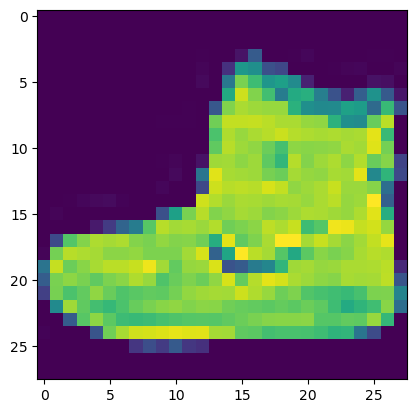

In [21]:
plt.imshow(image.squeeze())

But our dataset is in grayscale. So will convert to grayscale.

Text(0.5, 1.0, 'Ankle boot')

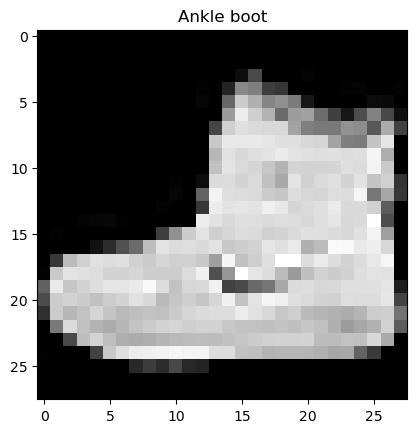

In [22]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

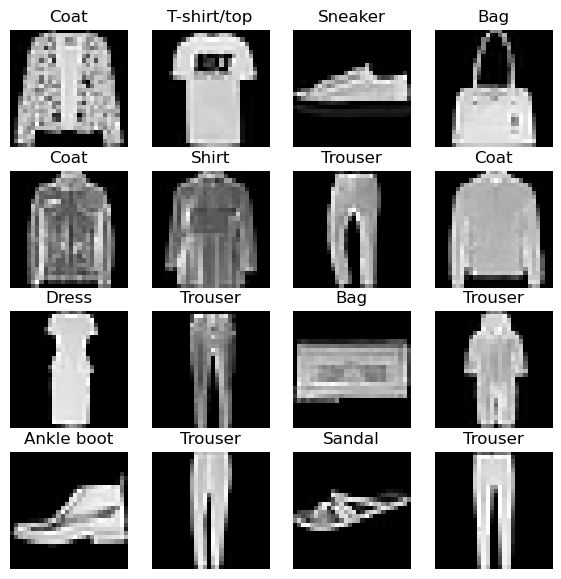

In [33]:
#View more images
fig = plt.figure(figsize=(7,7))
rows, cols = 4,4
for i in range(1, rows*cols + 1):
    rand = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[rand]
    fig.add_subplot(rows, cols, i)
    plt.title(class_names[label])
    plt.imshow(img.squeeze(), cmap='gray')
    plt.axis(False)

`DataLoader` is used to load the data to the model. It turn the dataset into a iterable of smaller data (batch size).

In [39]:
BATCH_SIZE = 32

train_dataloader = DataLoader(
    train_data, 
    batch_size=BATCH_SIZE, 
    shuffle=True # This shuffles the data that way present batch is different from before batch
)

test_dataloader = DataLoader(
    test_data,
    batch_size = BATCH_SIZE #shuffle doesn't matter
)
len(train_dataloader)


1875

1875*32 should be around `len(train_data)`